In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.insert(0,'./../src')

import numpy as np

import h5py
from collections import deque
from matplotlib import pyplot as plt

from models.Chiron import Chiron
from models.ChironBuilder import ChironBuilder
from models.Callback import SaveCB

from utils.refactored2.DataPrepper import PrepData
from utils.Other import labelBaseMap, get_valid_taiyaki_filename, set_gpu_growth

In [3]:
filename = get_valid_taiyaki_filename()
dp = PrepData(filename, 300)

dp.pos = 1
read_ids = dp.get_train_read_ids()
read_id = read_ids[dp.pos]
train_x, train_y = dp._process_read(read_id, 300,300)

In [4]:
train_x = np.array(train_x) 
train_y = np.array(train_y)

print(train_x.shape)
print(train_y.shape)

(145, 300, 1)
(145,)


In [26]:
def _get_batch(dp):
        x = []
        y = []
        while(len(x) < dp.batch_size):
            read_id = dp.get_train_read_ids()[dp.pos] #TODO: Change this to only have read_ids
            read_x, read_y = dp._process_read(read_id, window_size=300, window_stride=300)
            dp.pos += 1

            for i,label in enumerate(read_y):
                if(len(label) > 0):
                    x.append(read_x[i])
                    y.append(read_y[i])
                else:
                    print(f"removing: {label}")
            
        x = np.resize(np.array(x), (dp.batch_size, dp.input_length, 1))
        y = np.resize(np.array(y), (dp.batch_size))
        return x,y

In [28]:
dp.pos = 1
signal_windows,label_windows = _get_batch(dp)

print(len(label_windows))

for w in label_windows:
    print(w)

removing: []
removing: []
removing: []
removing: []
removing: []
removing: []
removing: []
removing: []
removing: []
removing: []
500
[1, 2, 0, 1, 0, 3, 1, 2, 0, 2, 2, 3, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 3, 1, 2, 0, 3, 0, 3, 2]
[0, 0, 1, 3, 1, 3, 3, 2, 2, 2, 1, 2, 2, 3, 0, 3, 1, 0, 2, 1, 1, 3, 2, 3, 3, 0, 3, 1, 1, 1, 1, 2, 2]
[0, 2, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 1, 2, 3, 3, 2, 0, 2, 1, 2, 0, 3, 2, 2, 1, 1, 1, 3, 3, 1, 1]
[0, 3, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 3, 1, 0, 1, 3, 0, 0, 2, 0, 1, 1, 3, 0, 1, 3, 3, 3]
[1, 2, 3, 0, 1, 1, 3, 2, 1, 3, 1, 2, 0, 1, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2]
[1, 0, 2, 3, 1, 0, 0, 2, 1, 2, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 2, 1]
[2, 0, 1, 1, 2, 0, 3, 3, 3, 1, 1, 2, 0, 1, 1, 2, 2, 3, 1, 3, 2, 0, 2, 1, 2, 1, 0, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3]
[1, 1, 3, 1, 1, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2]
[3, 1, 0, 0, 0, 1, 3, 2, 1, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 1, 3, 2, 3, 1, 1,

[0, 2, 2, 0, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 2, 0, 1, 3, 0, 1, 1, 3, 2, 3, 2, 3]
[1, 2, 2, 3, 3, 3, 2, 1, 2, 2, 3, 0, 1, 2, 2, 2, 1, 0, 2, 3, 3, 0, 0, 0, 3, 0, 1, 3, 1]
[0, 1, 3, 0, 2, 0, 0, 2, 1, 3, 3, 3, 3, 1, 3, 1, 2, 2, 1, 0, 2, 3, 2, 3, 2, 0, 1]
[0, 3, 1, 2, 2, 1, 0, 0, 1, 3, 3, 1, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 1, 2, 1, 3]
[1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 2, 1, 3, 3, 2, 3, 1, 0, 0, 1, 1]
[1, 2, 2, 1, 3, 3, 0, 0, 0, 2, 1, 0, 3, 3, 3, 0, 0, 1, 3, 1, 3, 0, 0]
[0, 1, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3, 2, 1, 3, 3, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1]
[1, 0, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 3, 3, 2, 1, 3, 3, 0, 2, 1, 1, 3, 1, 1]
[3, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 0, 3, 1, 0, 3, 3, 1, 0]
[0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 0, 1, 3, 2, 2, 3, 0, 1, 0, 2, 2, 0, 0, 3, 1, 3, 1, 0, 0]
[1, 1, 3, 2, 3, 3, 0, 3, 1, 1, 0, 3, 1, 2, 0, 1, 3, 0, 1, 2, 1, 1]
[3, 1, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 3, 3, 0, 2, 2, 3, 1, 1, 1, 2, 0, 1, 3, 3, 0, 1, 1, 1]
[3, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 3, 3, 1, 1, 1, 

In [36]:
train_x_lens = np.array([[300-5] for x in train_x], dtype="float32")
train_y_lens = np.array([[len(x)] for x in train_y], dtype="float32")
            
for w in train_x_lens:
    print(w)

[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]
[295.]

In [4]:
read_id = data_preper.read_ids[10]
print(f"Read ID: {read_id}")

Read ID: 00055b21-193e-4c2c-953a-74cf189f248f


In [103]:
def load_read(read_id):
    with h5py.File(filename, 'r') as h5file:
        read = h5file['Reads'][read_id]
        DAC = list(read['Dacs'][()])
        RTS = deque(read['Ref_to_signal'][()])
        REF = deque(read['Reference'][()])
    return DAC,RTS,REF

def process_read(read_id, window_size, window_skip):
    x = []
    y = []
    
    with h5py.File(filename, 'r') as h5file:
        read = h5file['Reads'][read_id]
        DAC = list(read['Dacs'][()])
        RTS = deque(read['Ref_to_signal'][()])
        REF = deque(read['Reference'][()])

    curdacs  = deque( [[x] for x in DAC[RTS[0]:RTS[0]+window_size-window_skip]], window_size )
    curdacts = RTS[0]+ window_size-window_skip
    labels  = deque([])
    labelts = deque([])
    
    while RTS[0] < curdacts:
        labels.append(REF.popleft())
        labelts.append(RTS.popleft())

    while curdacts+window_skip < RTS[-1]-window_size:
        curdacs.extend([[x] for x in DAC[curdacts:curdacts+window_skip]])
        curdacts += window_skip

        while RTS[0] < curdacts:
            labels.append(REF.popleft())
            labelts.append(RTS.popleft())

        while len(labelts) > 0 and labelts[0] < curdacts - window_size:
            labels.popleft()
            labelts.popleft()

        x.append(list(curdacs))
        y.append(list(labels))
        
    return (x,y) 

window_size = 1000
window_skip = 100
dac, rts, ref = load_read(read_id)
x,y = process_read(read_id, window_size, window_skip)

In [63]:
lst = [1,1,1]
print(5*[0]+lst)

[0, 0, 0, 0, 0, 1, 1, 1]


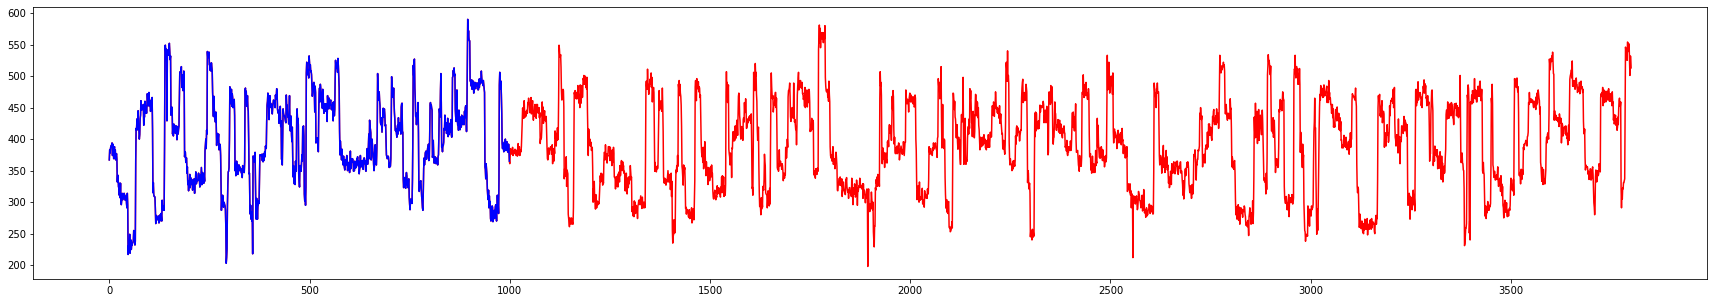

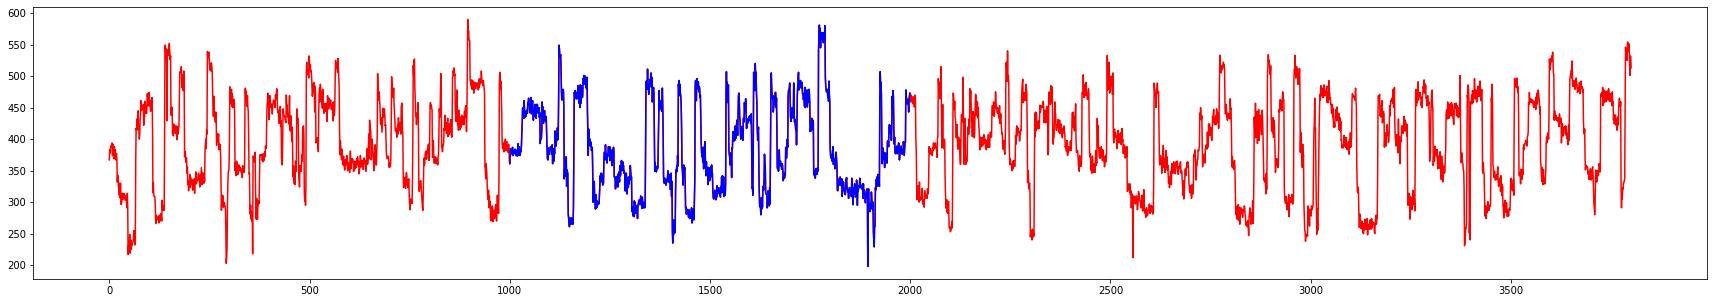

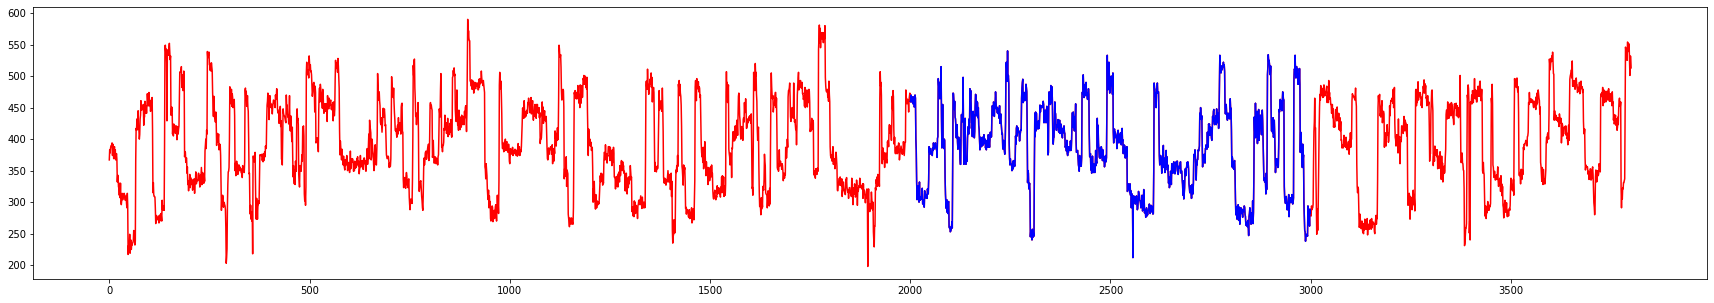

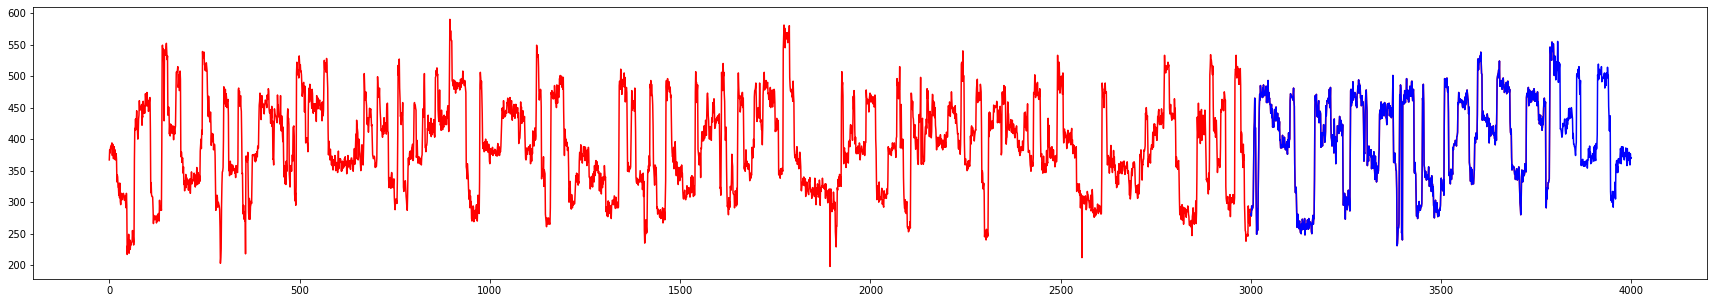

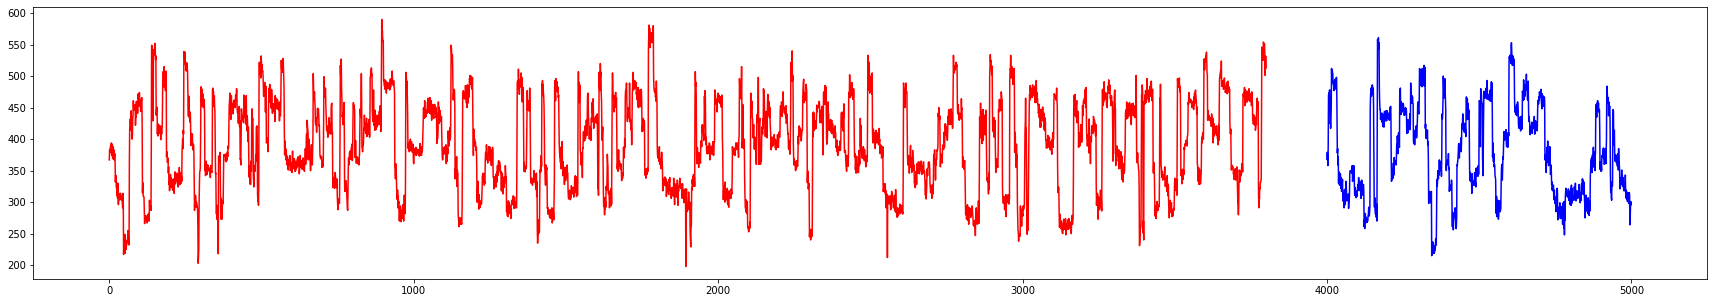

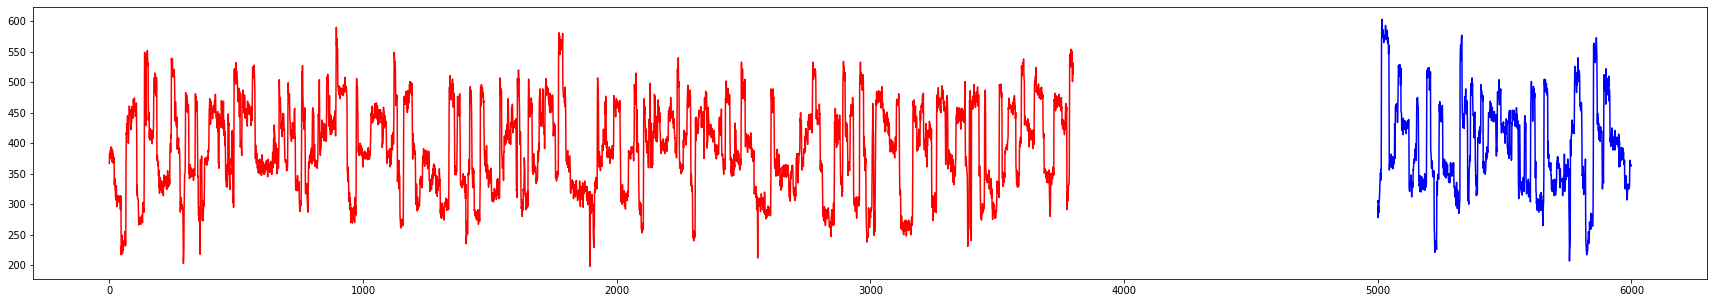

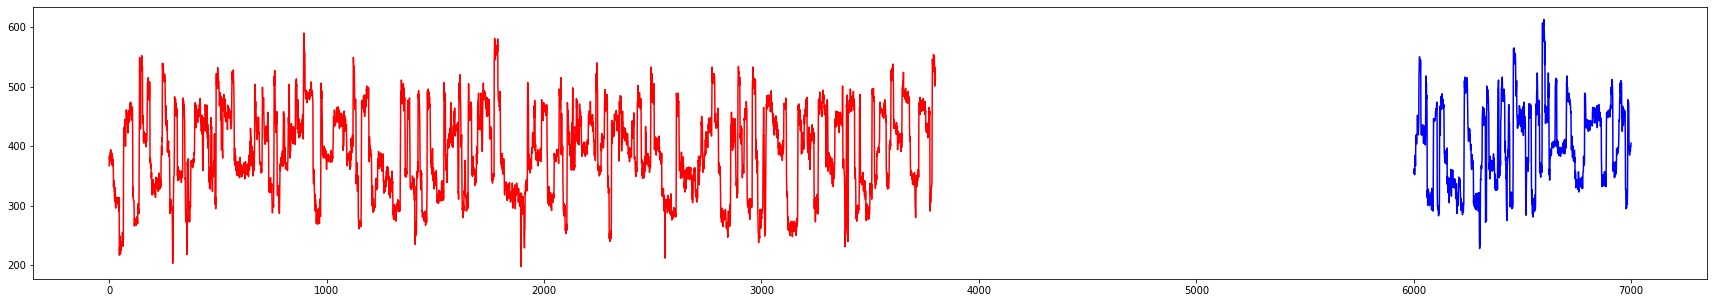

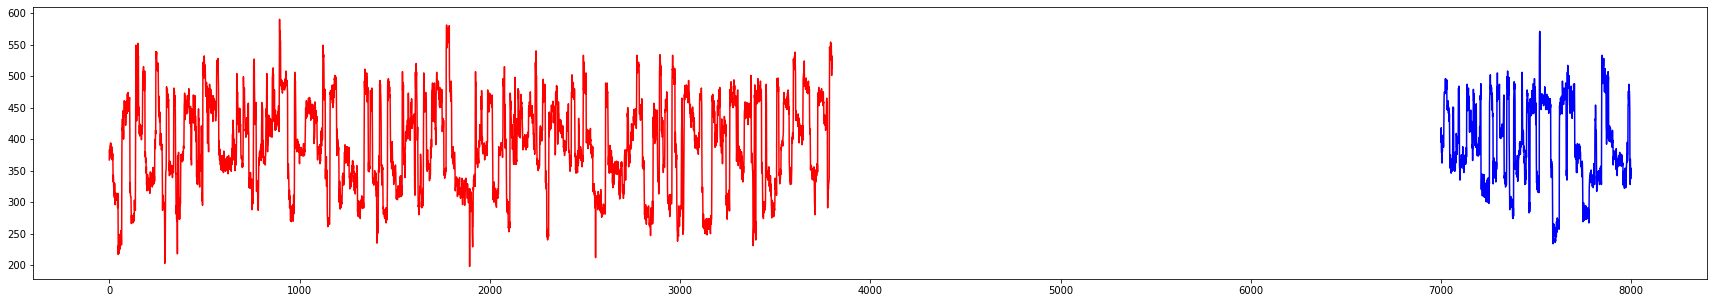

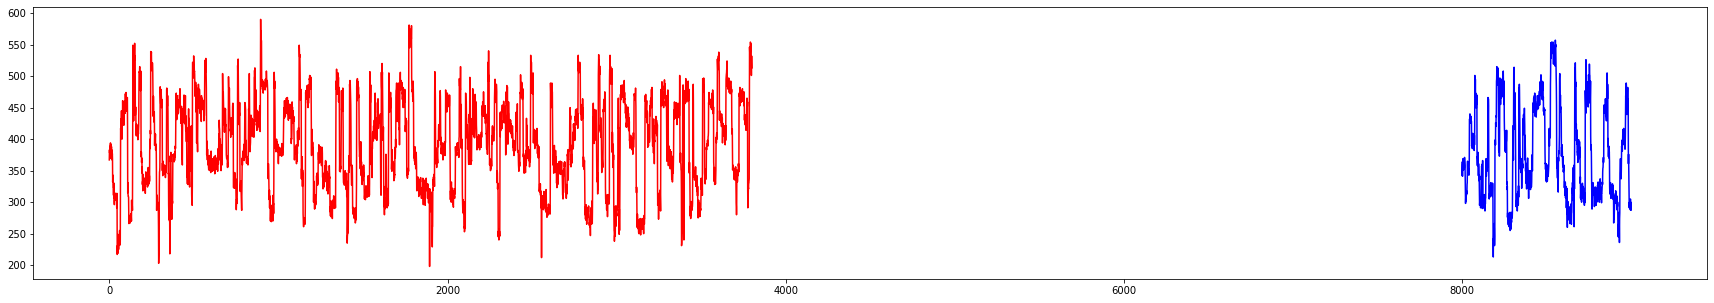

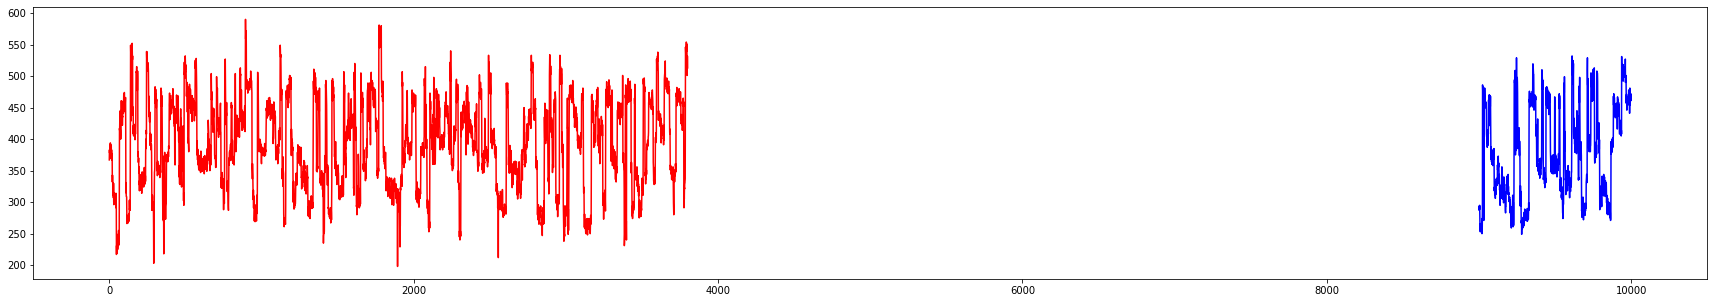

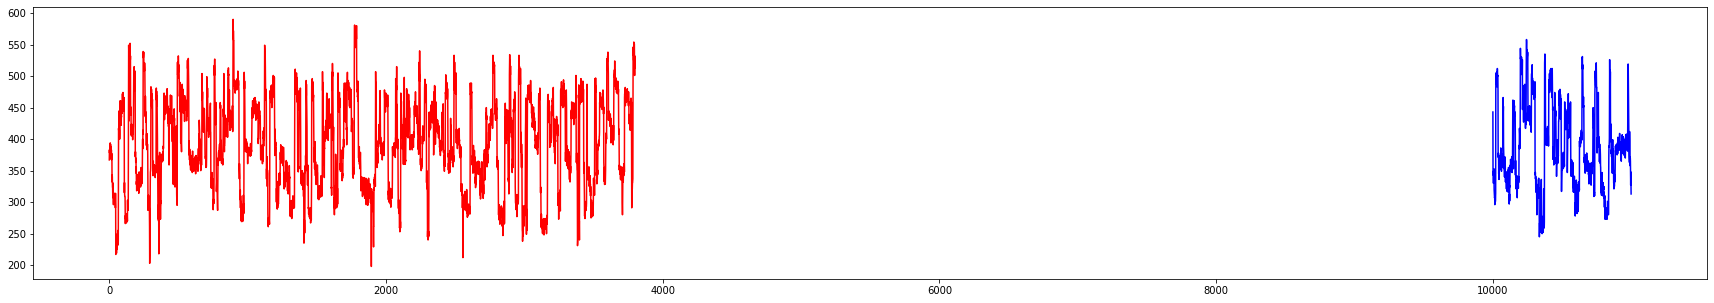

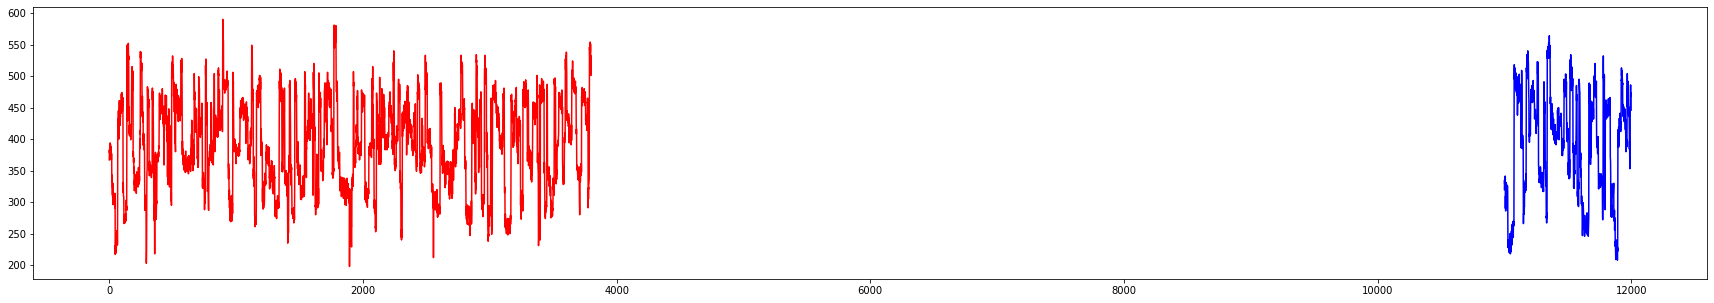

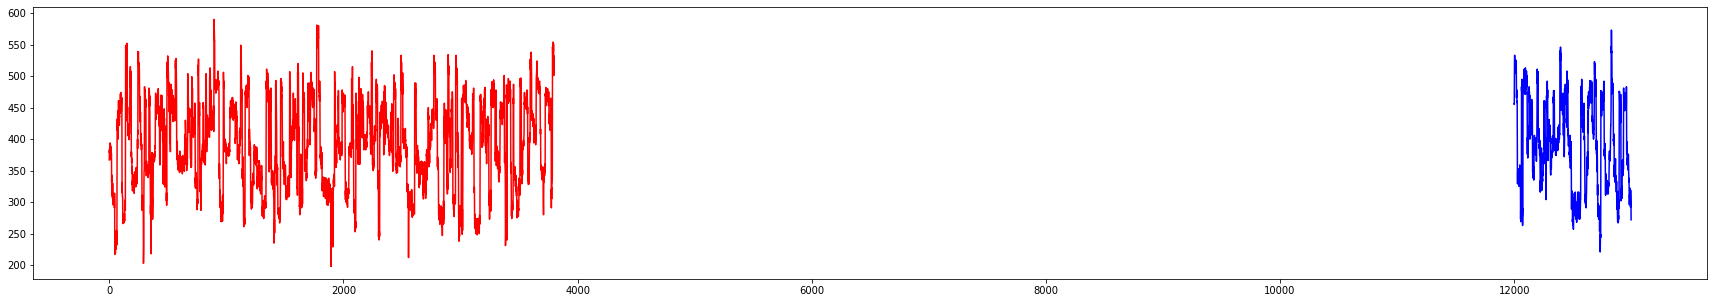

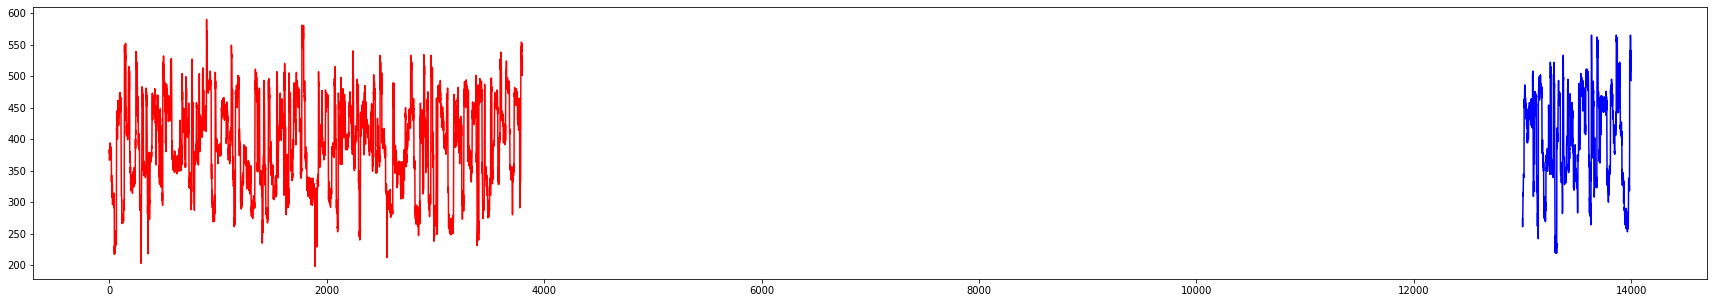

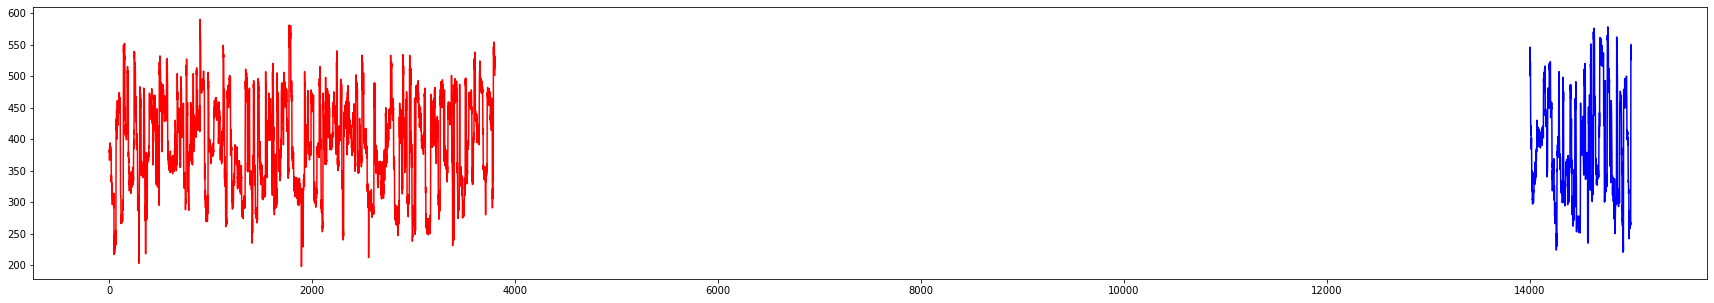

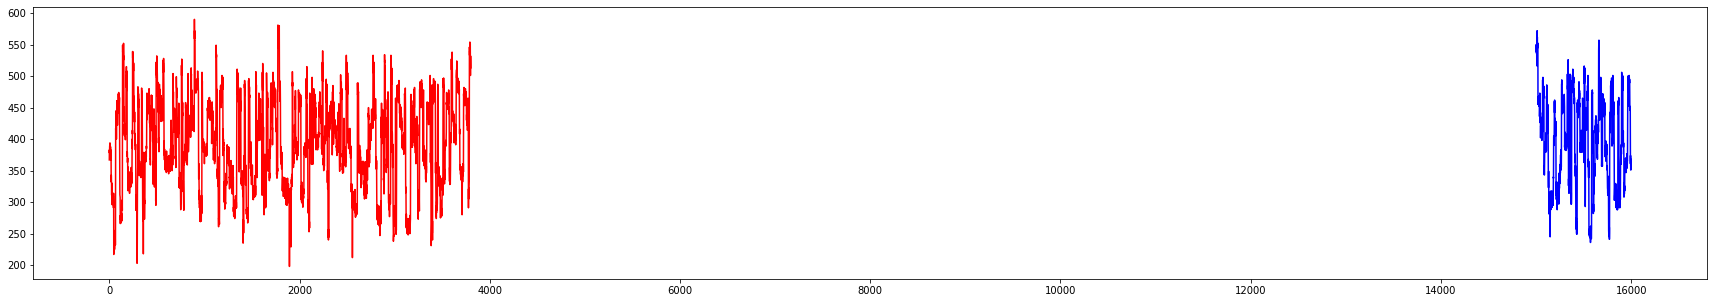

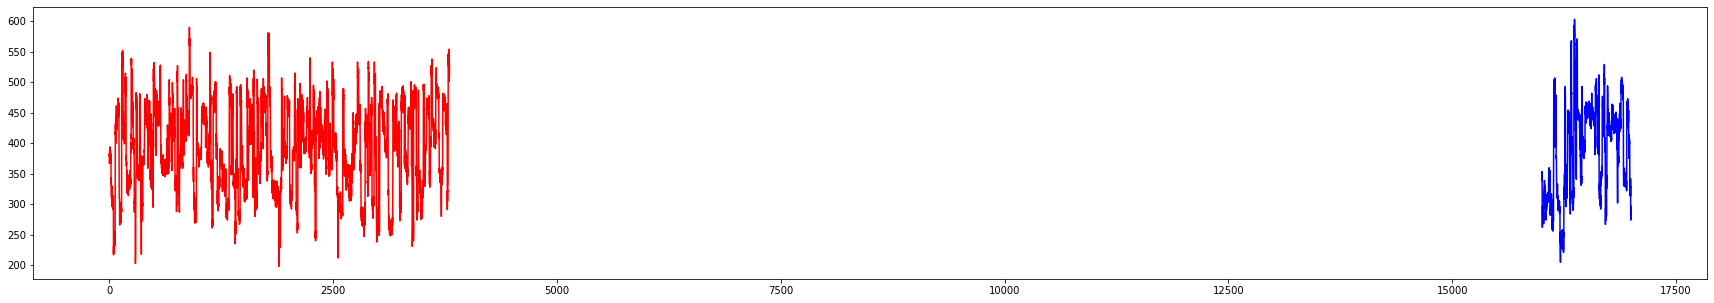

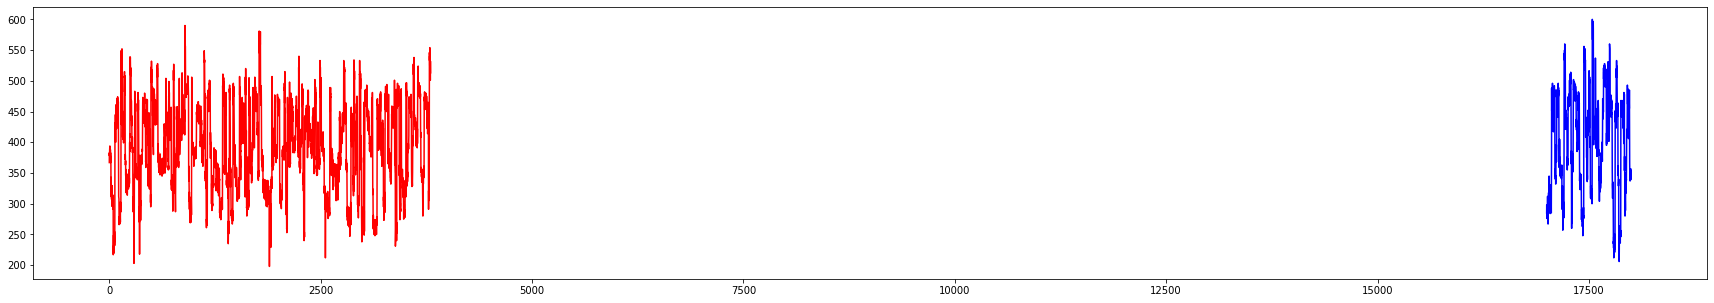

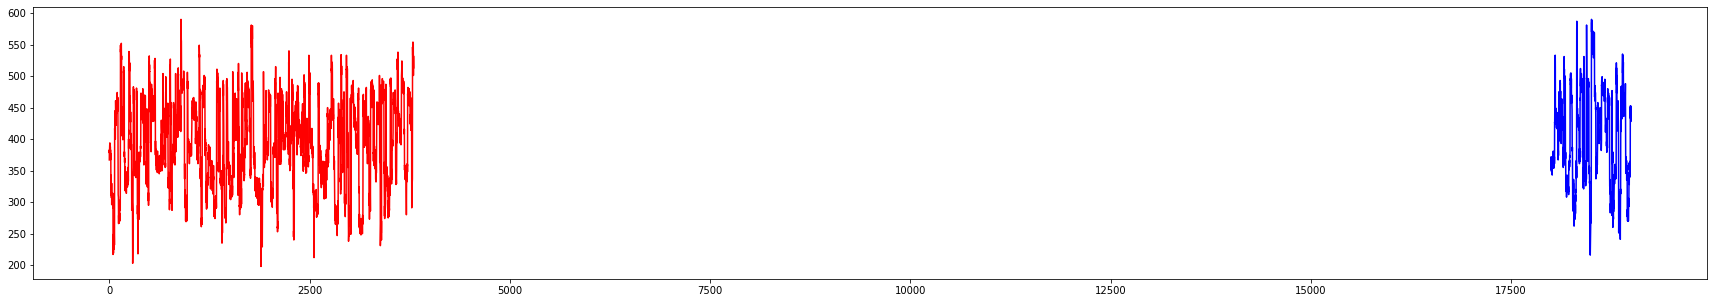

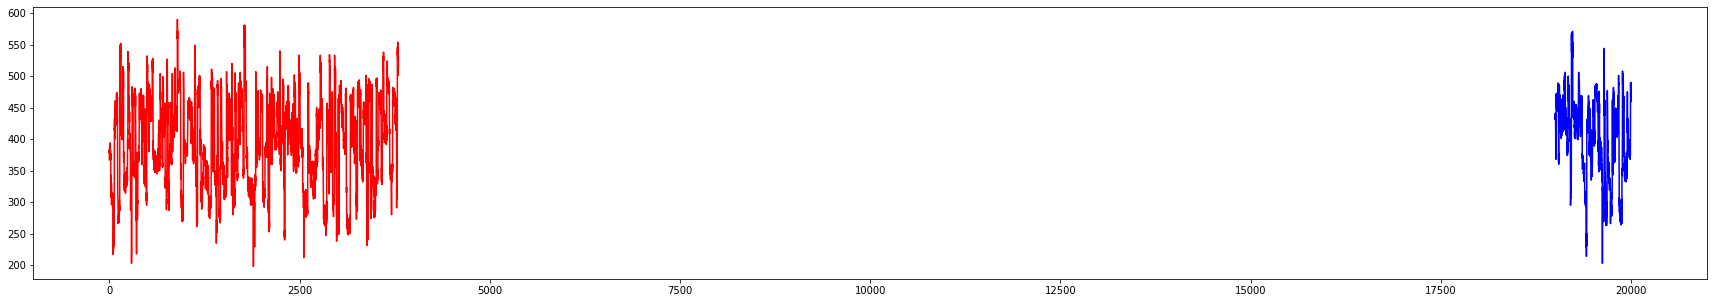

In [104]:
# plt.figure(figsize=(30,5))
# plt.plot(dac[rts[0]:2000], 'r', label="raw")
# plt.plot(x0, 'b')
# plt.show()

# plt.figure(figsize=(30,5))
# plt.plot(dac[rts[0]:2000], 'r', label="raw")
# plt.plot(5*[[None]] + x[1], 'b')
# plt.show()

for i in range(0,200,10):
    plt.figure(figsize=(30,5))
    plt.plot(dac[rts[0]:5000], 'r', label="raw")
    plt.plot((window_skip*i)*[[None]] + x[i], 'b')
    plt.show()